In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
x1 = [random.randint(1,4) for x in range(0,25)]
x2 = [random.randint(1,4) for x in range(0,25)]
y = [0 if (x1[x]+x2[x])>4 else 1 for x in range(0,25)]

In [3]:
dictt = {'x1':x1, 'x2':x2, 'y':y}
df = pd.DataFrame(dictt)

In [4]:
df.to_csv('sample2.csv',index=False)

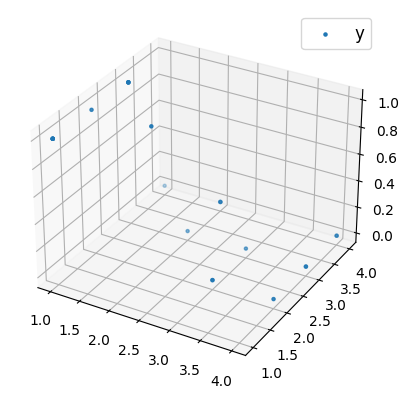

In [13]:
def view_dataset(dictt):
    x = []
    y = []
    random_x1 = np.array(dictt['x1'])
    random_x2 = np.array(dictt['x2'])
    for i in range(len(random_x1)):
        x1 = random_x1[i]
        x2 = random_x2[i]
        x.append([1, x1, x2])
        y.append(dictt['y'][i])
    return np.array(x), np.array(y)
 
x, y = view_dataset(dictt)
 
mpl.rcParams['legend.fontsize'] = 12
 
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
 
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5)
ax.legend()
#ax.view_init(45, 0)
 
plt.show()

[[2 3]
 [1 3]
 [1 2]
 [2 4]
 [1 1]
 [2 4]
 [1 3]
 [4 4]
 [4 4]
 [1 3]
 [2 2]
 [3 2]
 [4 2]
 [3 2]
 [1 1]
 [1 3]
 [2 4]
 [4 3]
 [1 4]
 [1 3]
 [1 1]
 [1 1]
 [3 3]
 [4 3]
 [2 4]]
[0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0]
[0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0]


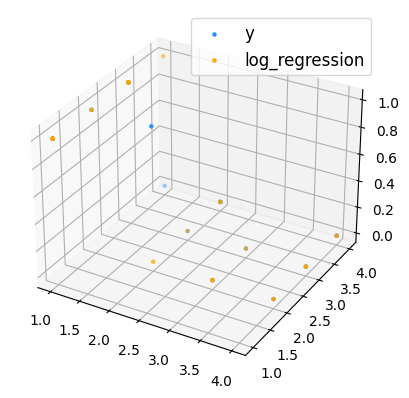

In [12]:
def param_init(X): 
    params = {} # initialize dictionary 
    _, n_features = X.shape # shape of training data

    # initializing coefficents to 0 
    params["W"] = np.zeros(n_features)
    params["b"] = 0
    return params


def mse(coef, x, y):
    return np.mean((np.dot(x, coef) - y)**2)/2

 
def gradients(coef, x, y):
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis=1)


def get_z(X, W, b): 
    z = np.dot(X, W) + b
    return z


def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g


def gradient_descent(X, y, params, lr, n_iter): 
    W = params["W"] 
    b = params["b"]
    m = X.shape[0] # number of training instances 

    for _ in range(n_iter): 
        # prediction with random weights
        g = sigmoid(get_z(X, W, b))
        # calculate the loss
        loss = -1/m * np.sum(y * np.log(g)) + (1 - y) * np.log(1-g)
        # partial derivative of weights 
        dW = 1/m * np.dot(X.T, (g - y))
        db = 1/m * np.sum(g - y)
        # updates to coefficients
        W -= lr * dW
        b -= lr * db 
    
    params["W"] = W
    params["b"] = b
    return params


def train(X, y, lr=0.01, n_iter=1000):
    init_params = param_init(X)
    params = gradient_descent(X, y, init_params, lr, n_iter)
    return params


def predict(X_test, params):
  
    z = np.dot(X_test, params["W"]) + params["b"]
    y_pred = sigmoid(z) >= 0.5
    return y_pred.astype("int")


def multilinear_regression(coef, x, y, lr, b1=0.9, b2=0.999, epsilon=1e-8):
    prev_error = 0
    m_coef = np.zeros(coef.shape)
    v_coef = np.zeros(coef.shape)
    moment_m_coef = np.zeros(coef.shape)
    moment_v_coef = np.zeros(coef.shape)
    t = 0
 
    while True:
        error = mse(coef, x, y)
        if abs(error - prev_error) <= epsilon:
            break
        prev_error = error
        grad = gradients(coef, x, y)
        g = sigmoid(get_z(X, W, b))
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t)
        moment_v_coef = v_coef / (1-b2**t)
 
        delta = ((lr / moment_v_coef**0.5 + 1e-8) *
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t)))
 
        coef = np.subtract(coef, delta)
    return coef
 

#coef = np.array([0, 0, 0])
#c = multilinear_regression(coef, x, y, 1e-1)
X_train = np.array([[x11[1],x11[2]] for x11 in x])
#y1 = y.reshape(-1,1)
print(X_train)
print(y)
params = train(X_train, y) # train model
y_pred = predict(X_train, params)
print(y_pred)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
 
ax.scatter(x[:, 1], x[:, 2], y, label='y',
           s=5, color="dodgerblue")
 
ax.scatter(x[:, 1], x[:, 2], y_pred,
           label='log_regression', s=5, color="orange")
 
#ax.view_init(15, 0)
ax.legend()
plt.show()